# Random Forest 

## Paso 1: Carga del conjunto de datos

In [1]:
import logging
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import (
        train_test_split,
        cross_validate,
        cross_val_predict,
        GridSearchCV
)
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import (
    PowerTransformer,
    LabelEncoder,
    MinMaxScaler
)
from sklearn.ensemble import(
    RandomForestClassifier
)
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree
)
from sklearn.metrics import(
    accuracy_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    DetCurveDisplay
)
from sklearn.inspection import permutation_importance
logger = logging.getLogger(__name__)
logger.setLevel(logging.ERROR)

In [2]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df_raw.sample(10, random_state= 42)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
204,6,103,72,32,190,37.7,0.324,55,0
97,1,71,48,18,76,20.4,0.323,22,0
336,0,117,0,0,0,33.8,0.932,44,0
568,4,154,72,29,126,31.3,0.338,37,0
148,5,147,78,0,0,33.7,0.218,65,0


## Paso 2: Data preprocessing

In [4]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df = df_baking.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Paso 3:  Exploratory Data Analysis

In [6]:
df_train, df_test = train_test_split(
    df,test_size=0.2,
    random_state=42
)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               614 non-null    int64  
 1   glucose                   614 non-null    int64  
 2   bloodpressure             614 non-null    int64  
 3   skinthickness             614 non-null    int64  
 4   insulin                   614 non-null    int64  
 5   bmi                       614 non-null    float64
 6   diabetespedigreefunction  614 non-null    float64
 7   age                       614 non-null    int64  
 8   outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


In [7]:
display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
pregnancies,614.0,3.742671,3.313264,0.000,1.0000,3.0000,6.00000,17.00
glucose,614.0,120.855049,32.035057,0.000,100.0000,117.0000,139.00000,199.00
bloodpressure,614.0,69.415309,18.512599,0.000,64.0000,72.0000,80.00000,122.00
skinthickness,614.0,20.399023,15.433974,0.000,0.0000,23.0000,32.00000,63.00
insulin,614.0,81.438111,116.234835,0.000,0.0000,42.5000,129.75000,846.00
bmi,614.0,31.983388,7.740625,0.000,27.1000,32.0000,36.37500,67.10
diabetespedigreefunction,614.0,0.469168,0.336847,0.078,0.2415,0.3725,0.61375,2.42
age,614.0,32.907166,11.503437,21.000,24.0000,29.0000,40.00000,81.00
outcome,614.0,0.346906,0.476373,0.000,0.0000,0.0000,1.00000,1.00


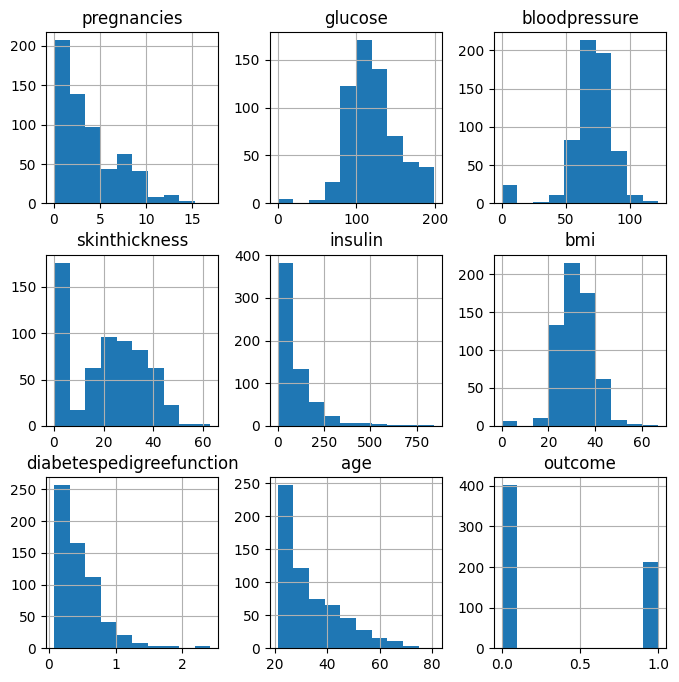

In [8]:
df_train.hist(figsize=(8,8))
plt.show()

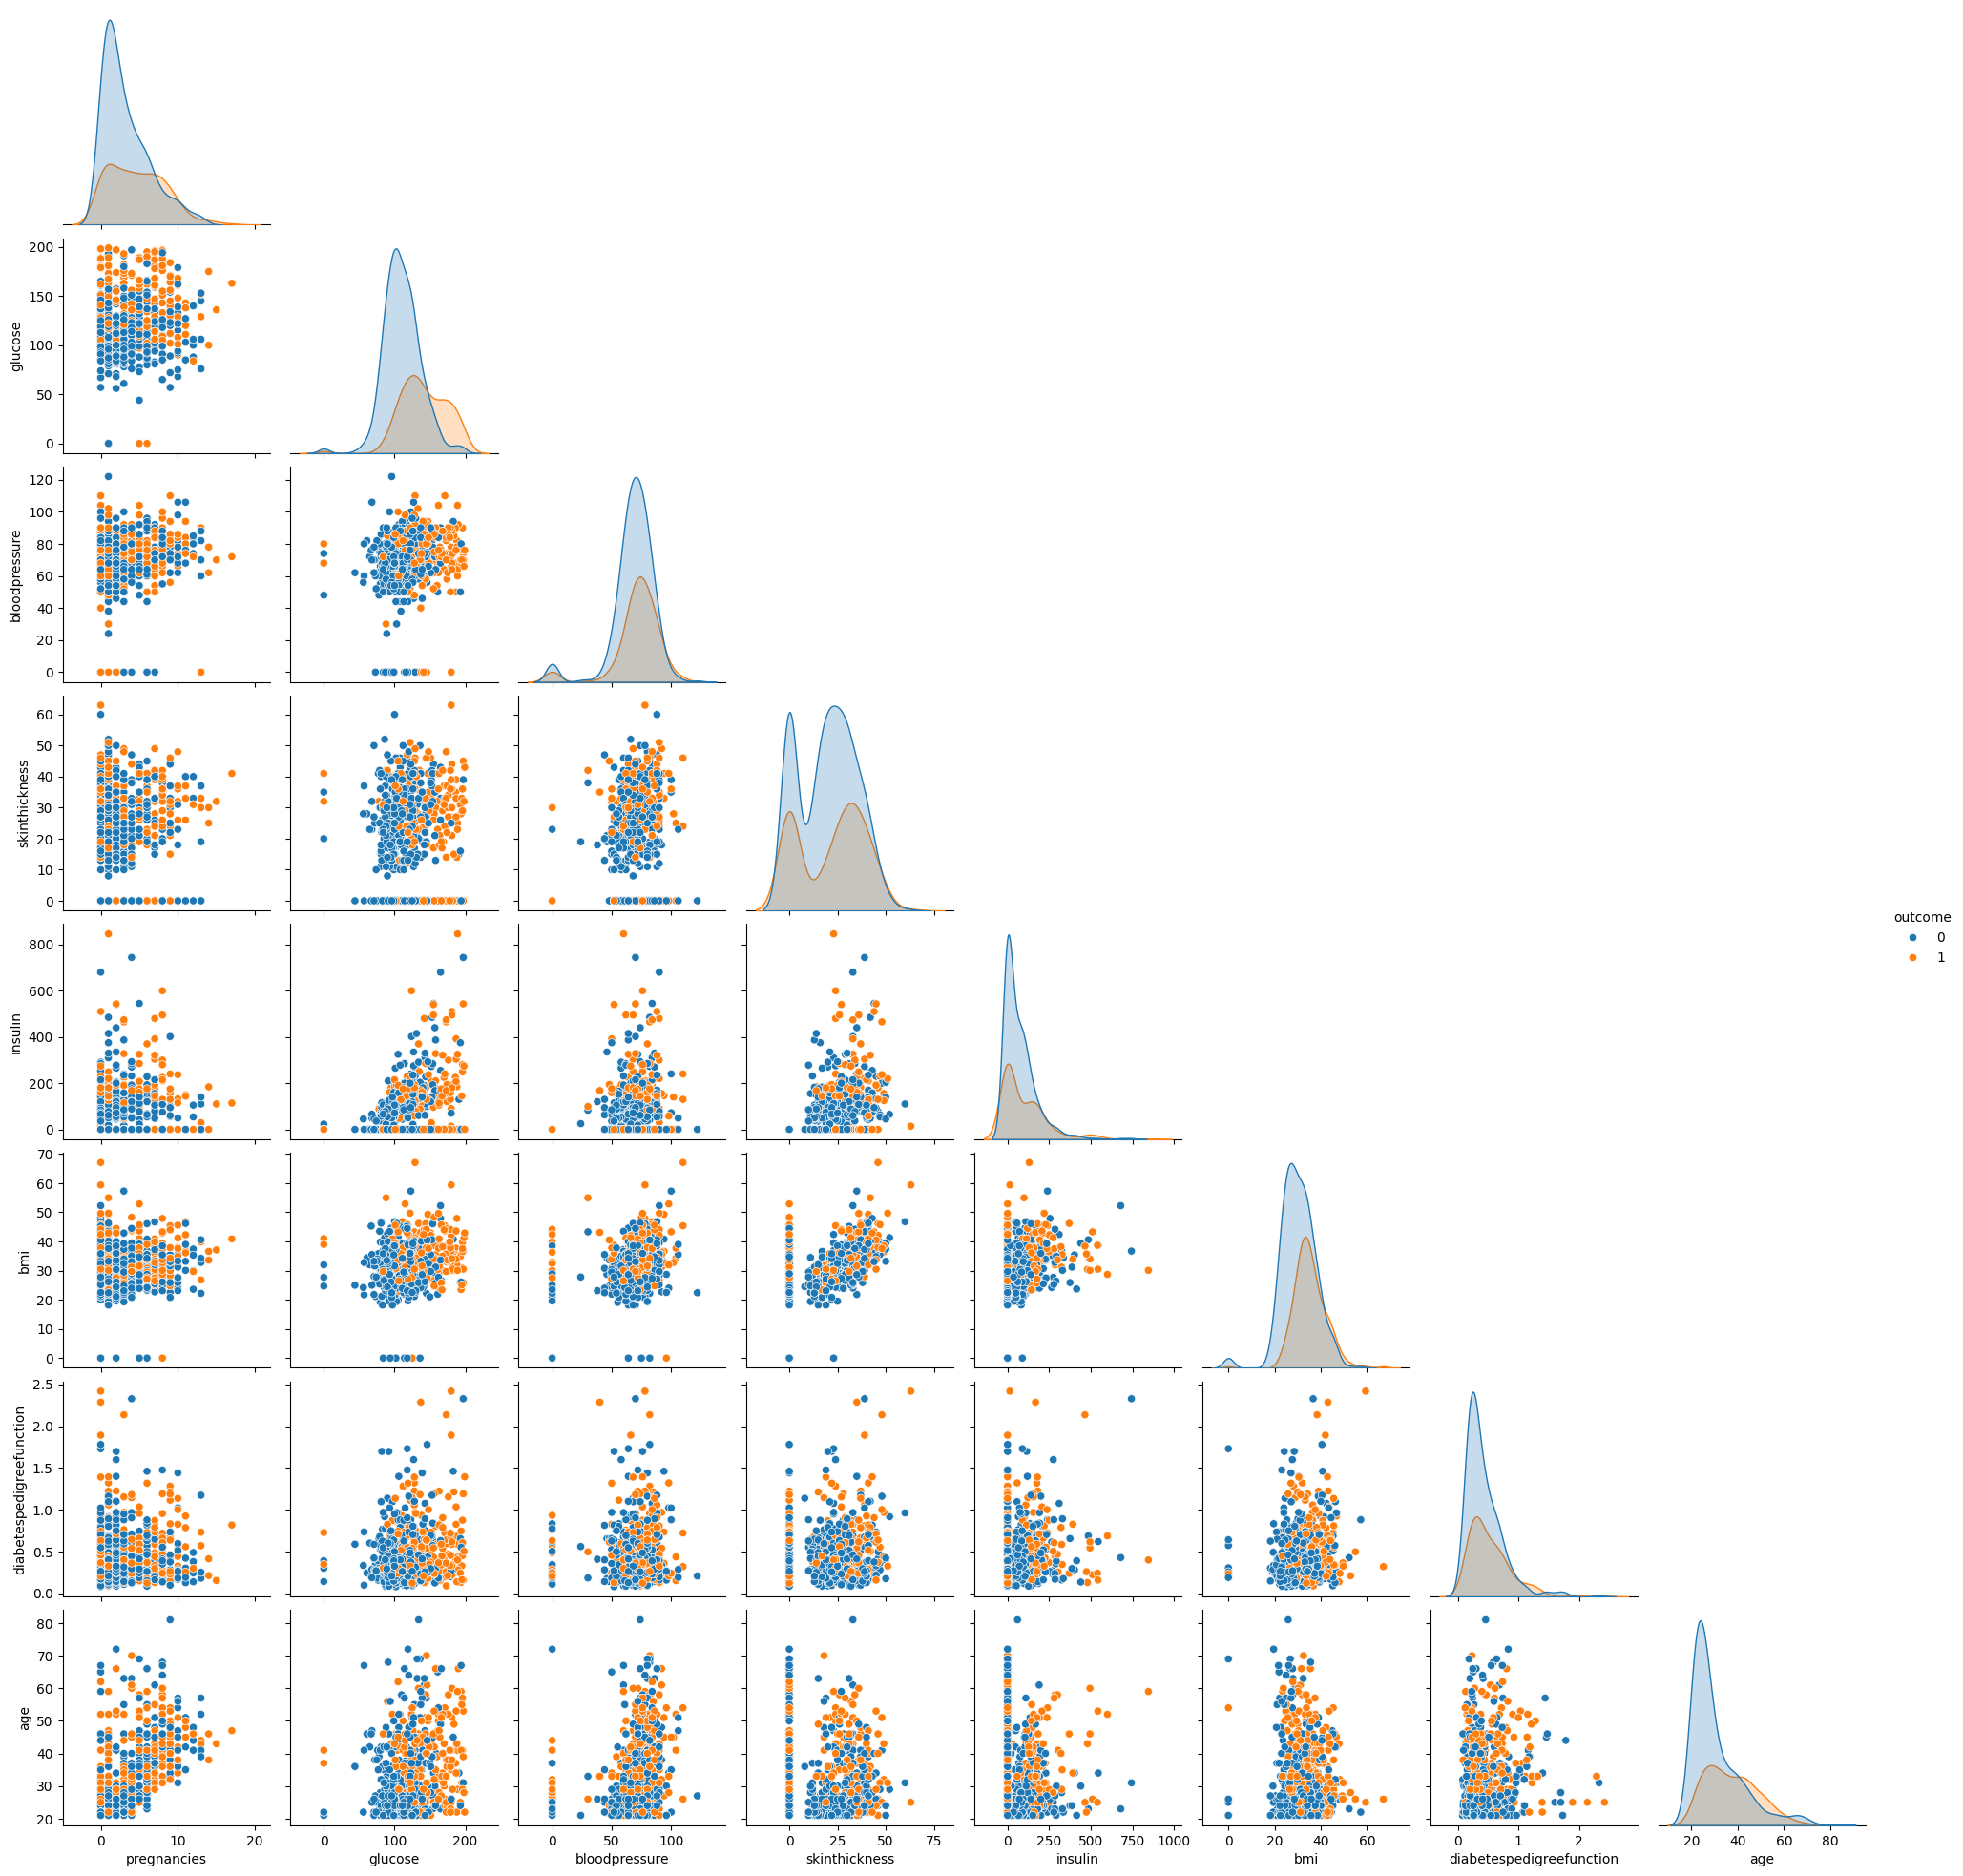

In [9]:
sns.pairplot(df_train, diag_kind='kde',hue='outcome' ,corner=True)# Especifica que los gráficos diagonales (que muestran la distribución de cada variable) 
# deben ser gráficos de densidad de Kernel (KDE) en lugar de histogramas. KDE es una técnica para estimar la función de 
# densidad de probabilidad de una variable aleatoria.
plt.show()

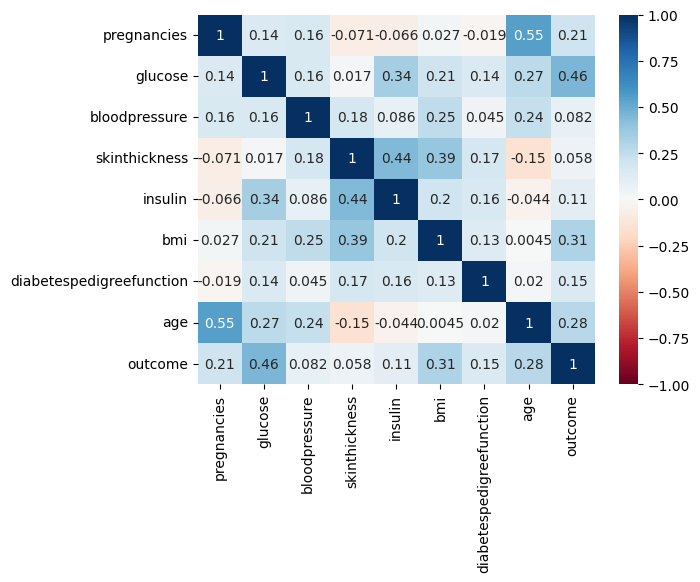

In [10]:
sns.heatmap(data=df_train.corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.show()

# Paso 4: Machine learning

In [11]:
X_train =  df_train.drop('outcome', axis=1)
y_train = df_train['outcome']
X_test =  df_test.drop('outcome', axis=1)
y_test = df_test['outcome']

In [12]:
selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction,age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [13]:
clf_rforest_p = Pipeline([
    ("rforest", RandomForestClassifier(random_state=42)),
])

In [14]:
clf_rforest_p.fit(X_train_sel, y_train)

Pipeline(steps=[('rforest', RandomForestClassifier(random_state=42))])

accuracy: 74.68
f1 score: 64.86
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



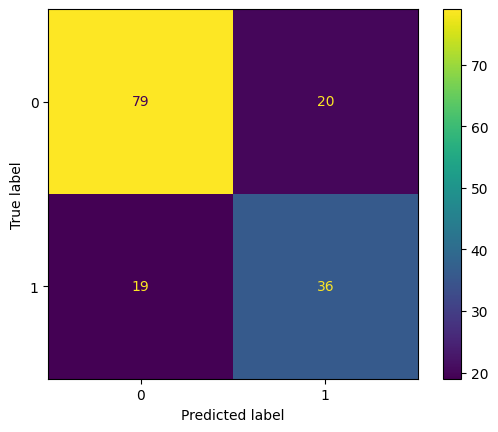

In [15]:
y_hat = clf_rforest_p.predict(X_test_sel)
print(f'accuracy: {accuracy_score(y_test,y_hat)*100:.2f}')
print(f'f1 score: {f1_score(y_test,y_hat)*100:.2f}')
print(classification_report(y_test,y_hat))
ConfusionMatrixDisplay.from_predictions(y_test,y_hat)
plt.show()

In [16]:
clf_rforest_cv = GridSearchCV(
    clf_rforest_p,
    param_grid={
        "rforest__n_estimators": [20,60,70,100],
        "rforest__bootstrap": [True, False],
        },
    cv=5,
    scoring='f1',
    n_jobs = -1 # usa todos los trabajadores que puedas
)

In [17]:
clf_rforest_cv.fit(X_train_sel, y_train)
clf_rforest_cv.best_params_

{'rforest__bootstrap': True, 'rforest__n_estimators': 70}

accuracy: 76.62
f1 score: 67.86
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



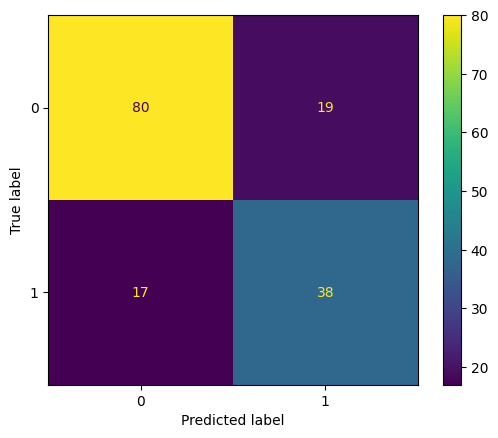

In [18]:
y_hat = clf_rforest_cv.predict(X_test_sel)
print(f'accuracy: {accuracy_score(y_test,y_hat)*100:.2f}')
print(f'f1 score: {f1_score(y_test,y_hat)*100:.2f}')
print(classification_report(y_test,y_hat))
ConfusionMatrixDisplay.from_predictions(y_test,y_hat)
plt.show()

Optimizando el modelo podemos observar que hasta ahora ha funcionado mejor el algoritmo decision tree, para este ejemplo en particular

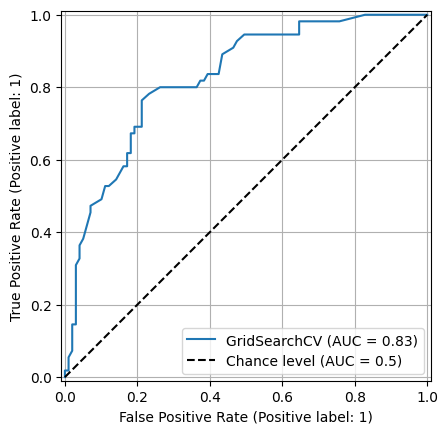

In [19]:
RocCurveDisplay.from_estimator(
    clf_rforest_cv, X_test_sel, y_test, plot_chance_level=True
)
plt.grid(True)
plt.show()

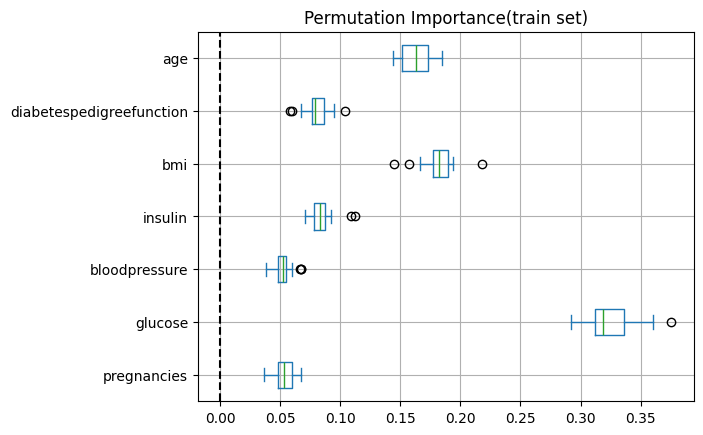

In [20]:
importance = permutation_importance(clf_rforest_cv,X_train_sel,y_train,n_repeats=25,random_state=2025)
importance_df = pd.DataFrame(importance.importances.T,columns=X_train_sel.columns)
ax = importance_df.plot.box(vert=False)
ax.axvline(x=0,color="k",linestyle="--")
ax.set_title("Permutation Importance(train set)")
ax.grid(True)
plt.show()